In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram,linkage
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import AgglomerativeClustering

In [2]:
df = pd.read_csv(r'C:\Users\PC\Downloads\Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
df.set_index('CustomerID',inplace=True)
#df.drop('Genre', axis=1, inplace=True)
df["Genre"] = df["Genre"].astype("category")

In [4]:
df["Genre"] = df["Genre"].map({"Male": 0 , "Female": 1})

In [5]:
df.dtypes

Genre                     category
Age                          int64
Annual Income (k$)           int64
Spending Score (1-100)       int64
dtype: object

In [19]:
scaler=StandardScaler()
df1=scaler.fit_transform(df)

In [20]:
df.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


In [22]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Genre                   200 non-null    category
 1   Age                     200 non-null    int64   
 2   Annual Income (k$)      200 non-null    int64   
 3   Spending Score (1-100)  200 non-null    int64   
dtypes: category(1), int64(3)
memory usage: 6.6 KB


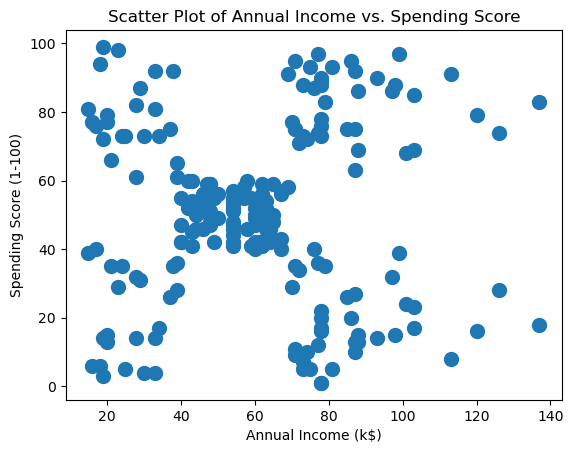

In [24]:
plt.scatter(x=df['Annual Income (k$)'].values, y=df['Spending Score (1-100)'].values,s=100)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Scatter Plot of Annual Income vs. Spending Score')
plt.show()

In [72]:
X=df.iloc[:,[3,4]].values
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i,init='k-means++',random_state=0)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

IndexError: positional indexers are out-of-bounds

In [68]:
kmeans=KMeans(n_clusters=5,init='k-means++')
kmeans_labels=kmeans.fit_predict(df)

In [63]:
dbscan=DBSCAN(eps=0.8,min_samples=3)
dbscan_labels=dbscan.fit_predict(df1)
#labels=dbscan.labels_

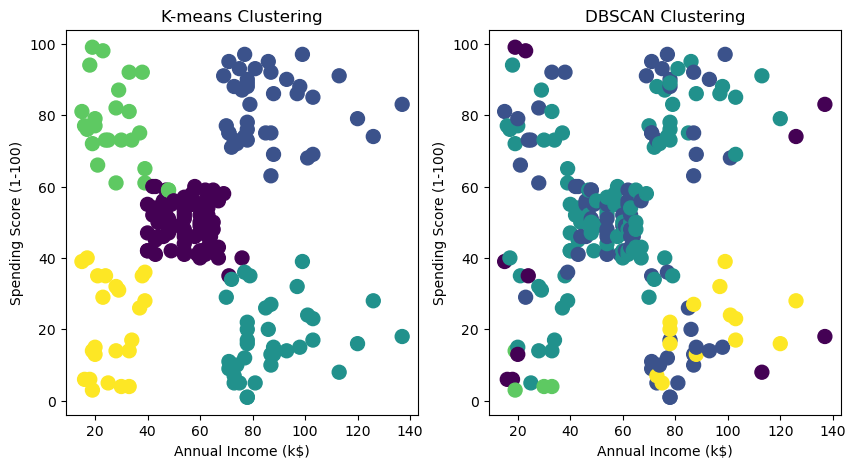

In [74]:
fig, axis = plt.subplots(1, 2, figsize=(10, 5))

axis[0].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=kmeans_labels,s=100)
axis[0].set_title('K-means Clustering')
axis[0].set_xlabel('Annual Income (k$)')
axis[0].set_ylabel('Spending Score (1-100)')

axis[1].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=dbscan_labels,s=100)
axis[1].set_title('DBSCAN Clustering')
axis[1].set_xlabel('Annual Income (k$)')
axis[1].set_ylabel('Spending Score (1-100)')

plt.show()

In [65]:
silhouette_coefficient = metrics.silhouette_score(df,dbscan_labels)
print(f"Silhouette Coefficient: {silhouette_coefficient:.3f}")

Silhouette Coefficient: -0.044


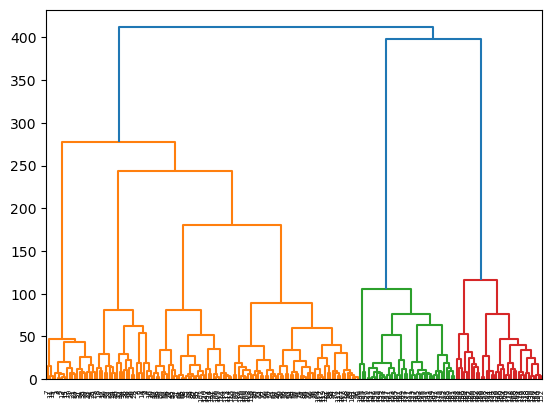

In [16]:
linkage_data = linkage(df, method='ward', metric='euclidean')
dendrogram(linkage_data)
plt.show()